In [3]:
#install specific version of the AutoML framework FEDOT

!pip install git+https://github.com/nccr-itmo/FEDOT.git@jupyter-intro

  Cloning https://github.com/nccr-itmo/FEDOT.git (to revision jupyter-intro) to c:\users\alad_\appdata\local\temp\pip-req-build-5crow0k2
  Using cached scikit_optimize-0.7.4-py2.py3-none-any.whl (80 kB)
  Using cached pandas-1.1.0-cp38-cp38-win_amd64.whl (9.6 MB)
  Using cached statsmodels-0.12.0-cp38-none-win_amd64.whl (9.2 MB)
  Using cached ete3-3.1.1-py3-none-any.whl
  Using cached pytest-5.2.0-py3-none-any.whl (226 kB)
  Using cached anytree-2.8.0-py2.py3-none-any.whl (41 kB)
  Using cached typing-3.7.4.1-py3-none-any.whl (25 kB)
  Using cached scikit_learn-0.22.1-cp38-cp38-win_amd64.whl (6.4 MB)
  Using cached networkx-2.4-py3-none-any.whl (1.6 MB)
  Using cached xgboost-1.0.1-py3-none-win_amd64.whl (24.6 MB)
  Using cached Pillow-7.1.2-cp38-cp38-win_amd64.whl (2.0 MB)
  Using cached imageio-2.8.0-py3-none-any.whl (3.3 MB)
  Using cached hyperopt-0.2.4-py2.py3-none-any.whl (964 kB)
  Using cached joblib-0.17.0-py3-none-any.whl (301 kB)
  Using cached nltk-3.5-py3-none-any.whl
  U

  Running command git clone -q https://github.com/nccr-itmo/FEDOT.git 'C:\Users\alad_\AppData\Local\Temp\pip-req-build-5crow0k2'
  Running command git checkout -b jupyter-intro --track origin/jupyter-intro
  Branch 'jupyter-intro' set up to track remote branch 'jupyter-intro' from 'origin'.
  Switched to a new branch 'jupyter-intro'
  Running command git clone -q https://github.com/nccr-itmo/FEDOT.git 'C:\Users\alad_\AppData\Local\Temp\pip-req-build-wh7_7da0'
  Running command git checkout -b jupyter-intro --track origin/jupyter-intro
  Branch 'jupyter-intro' set up to track remote branch 'jupyter-intro' from 'origin'.
  Switched to a new branch 'jupyter-intro'


In [93]:
#FOR 5351 WELL
# init model for the time series forecasting
from fedot.api.api_runner import Fedot
from fedot.core.repository.tasks import TsForecastingParams, TaskTypesEnum, Task
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train_data_path = 'input_data/oil_crm_prod_X5351_300.csv'
train_data = pd.read_csv(train_data_path)

composer_params = {'max_depth': 1,
                   'max_arity': 2,
                   'learning_time': 3,
                   'with_tuning': False}

model = Fedot(ml_task='ts_forecasting', composer_params=composer_params,
                  task_params=TsForecastingParams(forecast_length=100,
                                                  max_window_size=30,
                                                  make_future_prediction=True))
#run AutoML model design

chain = model.fit(features=train_data_path, target='target')

# use model to obtain forecast

ts_forecast = model.forecast(pre_history=train_data_path, forecast_length=100)

Best metric is 124.73191233947689
Generation num: 0
max_depth: 1, no improvements: 0
spent time: 3.3 min
Best metric is 123.84319319281019
Composition time: 3.333 min
Algorithm was terminated due to processing time limit
GP composition finished
Fit chain from scratch


62.168326999999934


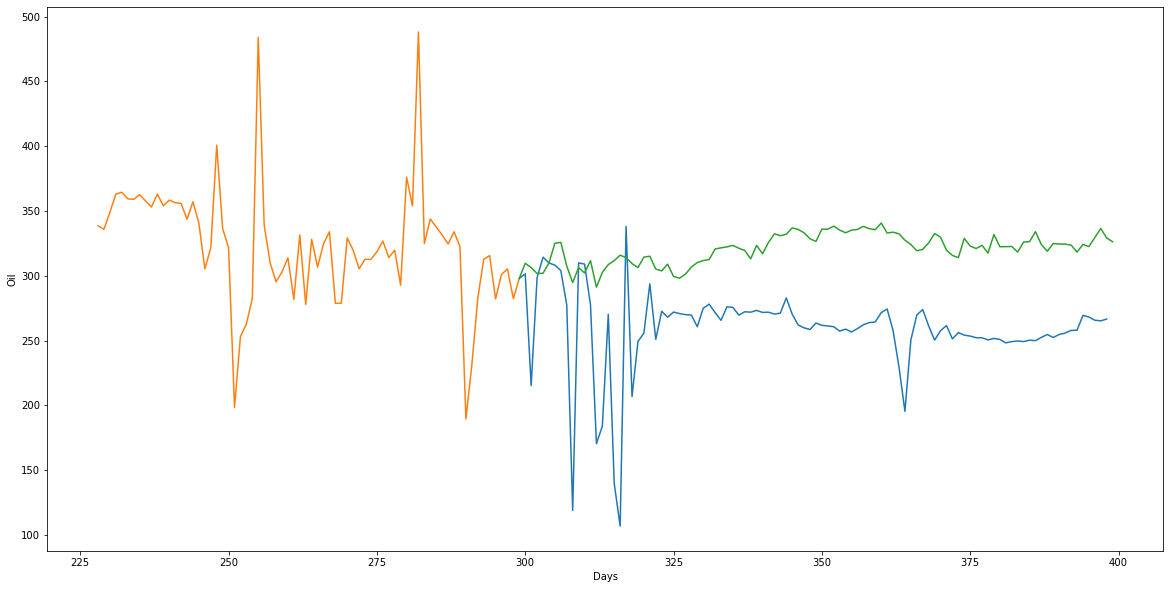

In [95]:
#plot forecasting result
import matplotlib.pyplot as plt
a = pd.read_csv('input_data/oil_crm_prod_X5351.csv')
observed = a[299:399]

last_ind = int(round(model.train_data.idx[-1]))
plt.figure(figsize=(20, 10))
plt.xlabel('Days')
plt.ylabel('Oil')
plt.plot(observed.prod_X5351)
plt.plot(model.train_data.idx[-72:], model.train_data.target[-72:])
plt.plot(range(last_ind, last_ind+len(ts_forecast)+1), np.append(model.train_data.target[-1], ts_forecast))

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(observed.prod_X5351, ts_forecast))

In [96]:
#FOR 5599 WELL
# init model for the time series forecasting
from fedot.api.api_runner import Fedot
from fedot.core.repository.tasks import TsForecastingParams, TaskTypesEnum, Task

train_data_path = 'input_data/oil_crm_prod_X5599_300.csv'
train_data = pd.read_csv(train_data_path)

composer_params = {'max_depth': 1,
                   'max_arity': 2,
                   'learning_time': 3,
                   'with_tuning': False}

model = Fedot(ml_task='ts_forecasting', composer_params=composer_params,
                  task_params=TsForecastingParams(forecast_length=100,
                                                  max_window_size=30,
                                                  make_future_prediction=True))
#run AutoML model design
chain = model.fit(features=train_data_path, target='target')

ts_forecast = model.forecast(pre_history=train_data_path, forecast_length=100)

Best metric is 246.73703436702735
Generation num: 0
max_depth: 1, no improvements: 0
spent time: 3.2 min
Best metric is 244.5804357983932
Composition time: 3.2 min
Algorithm was terminated due to processing time limit
GP composition finished
Fit chain from scratch


553.7167943416596


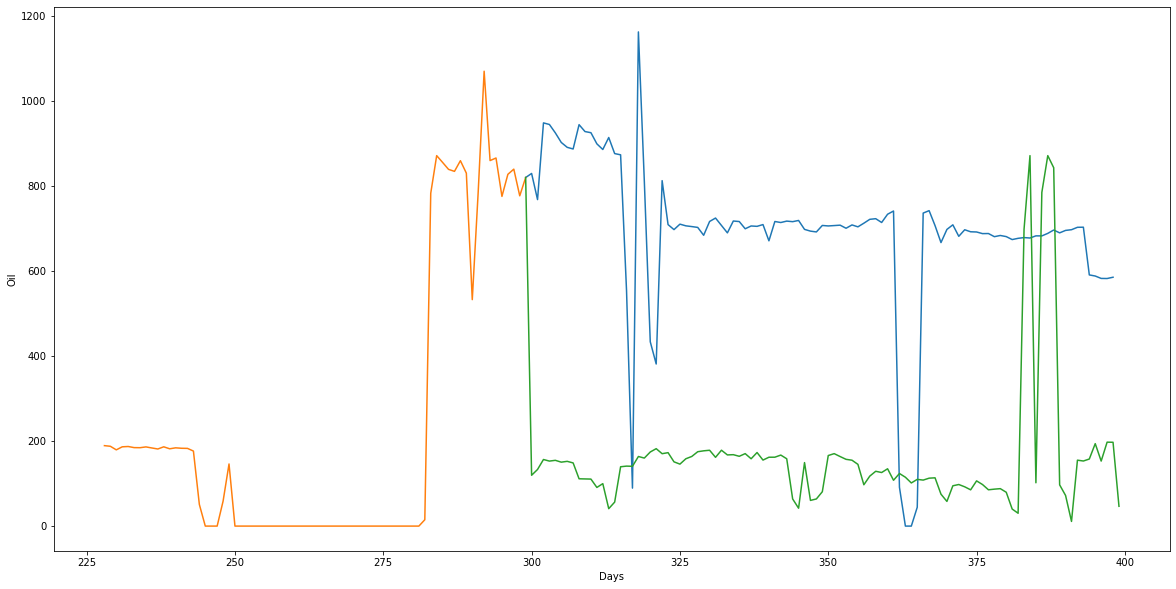

In [97]:
#plot forecasting result
import matplotlib.pyplot as plt
a = pd.read_csv('input_data/oil_crm_prod_X5599.csv')
observed = a[299:399]

last_ind = int(round(model.train_data.idx[-1]))
plt.figure(figsize=(20, 10))
plt.xlabel('Days')
plt.ylabel('Oil')
plt.plot(observed.prod_X5599)
plt.plot(model.train_data.idx[-72:], model.train_data.target[-72:])
plt.plot(range(last_ind, last_ind+len(ts_forecast)+1), np.append(model.train_data.target[-1], ts_forecast))

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(observed.prod_X5599, ts_forecast))

In [98]:
#FOR 7078 WELL
# init model for the time series forecasting
from fedot.api.api_runner import Fedot
from fedot.core.repository.tasks import TsForecastingParams, TaskTypesEnum, Task

train_data_path = 'input_data/oil_crm_prod_X7078_300.csv'
train_data = pd.read_csv(train_data_path)

composer_params = {'max_depth': 1,
                   'max_arity': 2,
                   'learning_time': 3,
                   'with_tuning': False}

model = Fedot(ml_task='ts_forecasting', composer_params=composer_params,
                  task_params=TsForecastingParams(forecast_length=100,
                                                  max_window_size=30,
                                                  make_future_prediction=True))
#run AutoML model design
chain = model.fit(features=train_data_path, target='target')

ts_forecast = model.forecast(pre_history=train_data_path, forecast_length=100)

Best metric is 335.2043032068898
Generation num: 0
max_depth: 1, no improvements: 0
spent time: 3.7 min
Best metric is 334.63482752822125
Composition time: 3.7 min
Algorithm was terminated due to processing time limit
GP composition finished
Fit chain from scratch


712.1109435142095


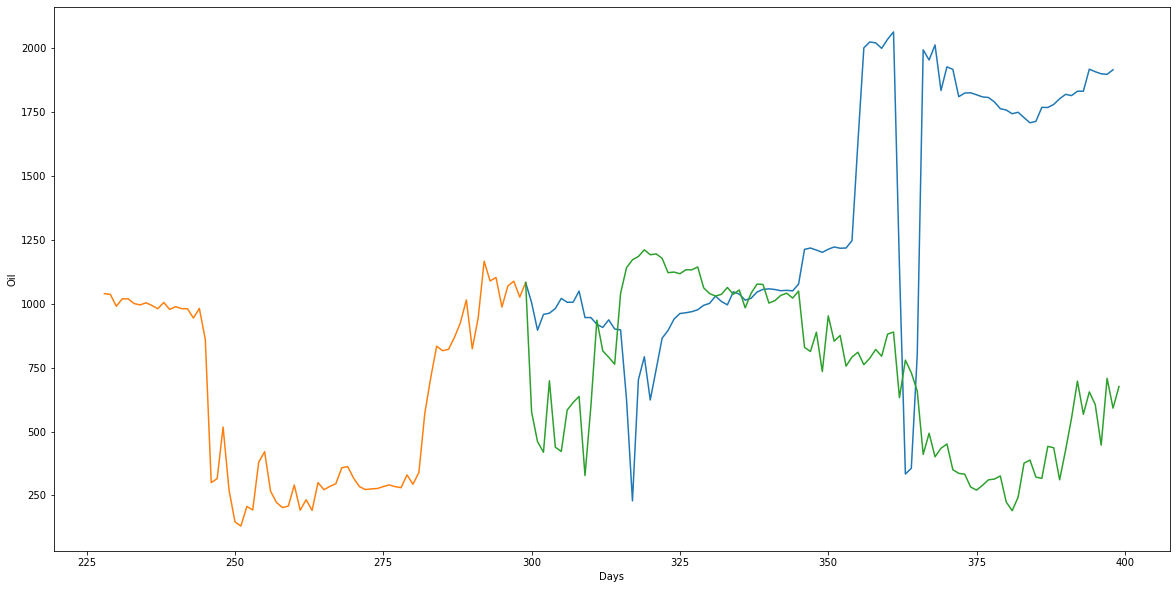

In [99]:
#plot forecasting result
import matplotlib.pyplot as plt
a = pd.read_csv('input_data/oil_crm_prod_X7078.csv')
observed = a[299:399]

last_ind = int(round(model.train_data.idx[-1]))
plt.figure(figsize=(20, 10))
plt.xlabel('Days')
plt.ylabel('Oil')
plt.plot(observed.prod_X7078)
plt.plot(model.train_data.idx[-72:], model.train_data.target[-72:])
plt.plot(range(last_ind, last_ind+len(ts_forecast)+1), np.append(model.train_data.target[-1], ts_forecast))

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(observed.prod_X7078, ts_forecast))

In [100]:
#FOR 7289 WELL
# init model for the time series forecasting
from fedot.api.api_runner import Fedot
from fedot.core.repository.tasks import TsForecastingParams, TaskTypesEnum, Task

train_data_path = 'input_data/oil_crm_prod_X7289_300.csv'
train_data = pd.read_csv(train_data_path)

composer_params = {'max_depth': 1,
                   'max_arity': 2,
                   'learning_time': 3,
                   'with_tuning': False}

model = Fedot(ml_task='ts_forecasting', composer_params=composer_params,
                  task_params=TsForecastingParams(forecast_length=100,
                                                  max_window_size=30,
                                                  make_future_prediction=True))
#run AutoML model design
chain = model.fit(features=train_data_path, target='target')

ts_forecast = model.forecast(pre_history=train_data_path, forecast_length=100)

Best metric is 81.73115650413072
Generation num: 0
max_depth: 1, no improvements: 0
spent time: 2.7 min
Best metric is 81.73115650413072
Composition time: 2.667 min
Algorithm was terminated due to processing time limit
GP composition finished
Fit chain from scratch


89.29644299999997


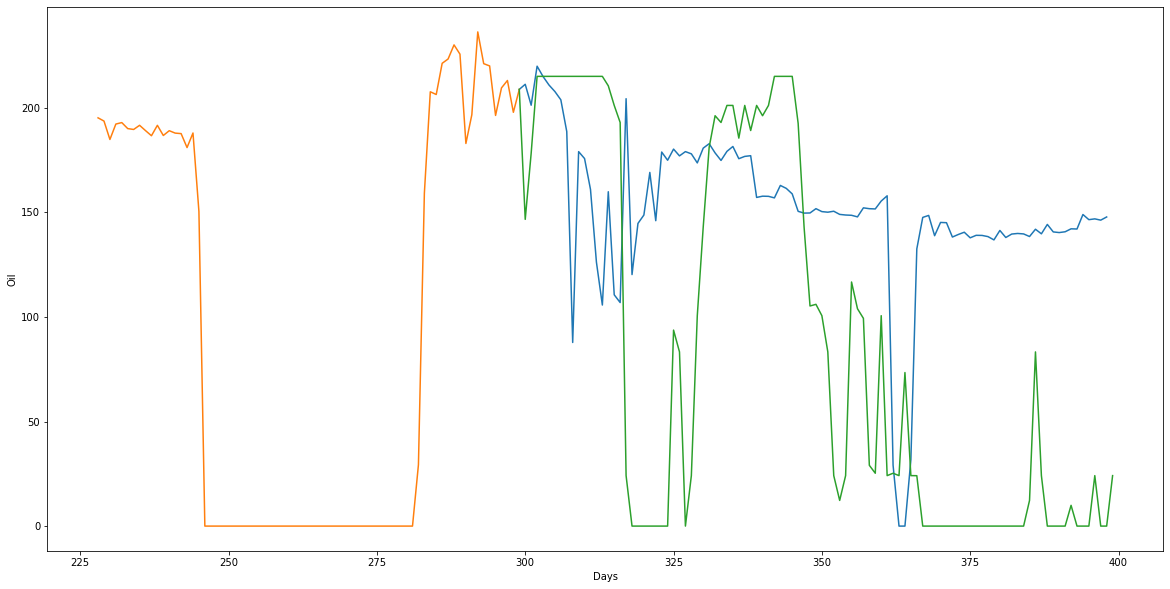

In [101]:
#plot forecasting result
import matplotlib.pyplot as plt
a = pd.read_csv('input_data/oil_crm_prod_X7289.csv')
observed = a[299:399]

last_ind = int(round(model.train_data.idx[-1]))
plt.figure(figsize=(20, 10))
plt.xlabel('Days')
plt.ylabel('Oil')
plt.plot(observed.prod_X7289)
plt.plot(model.train_data.idx[-72:], model.train_data.target[-72:])
plt.plot(range(last_ind, last_ind+len(ts_forecast)+1), np.append(model.train_data.target[-1], ts_forecast))

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(observed.prod_X7289, ts_forecast))

In [102]:
#FOR 7405f WELL
# init model for the time series forecasting
from fedot.api.api_runner import Fedot
from fedot.core.repository.tasks import TsForecastingParams, TaskTypesEnum, Task

train_data_path = 'input_data/oil_crm_prod_X7405f_300.csv'
train_data = pd.read_csv(train_data_path)

composer_params = {'max_depth': 1,
                   'max_arity': 2,
                   'learning_time': 3,
                   'with_tuning': False}

model = Fedot(ml_task='ts_forecasting', composer_params=composer_params,
                  task_params=TsForecastingParams(forecast_length=100,
                                                  max_window_size=30,
                                                  make_future_prediction=True))
#run AutoML model design
chain = model.fit(features=train_data_path, target='target')

ts_forecast = model.forecast(pre_history=train_data_path, forecast_length=100)

Best metric is 245.4271235657215
Generation num: 0
max_depth: 1, no improvements: 0
spent time: 3.8 min
Best metric is 245.4271235657215
Composition time: 3.75 min
Algorithm was terminated due to processing time limit
GP composition finished
Fit chain from scratch


190.88577999999998


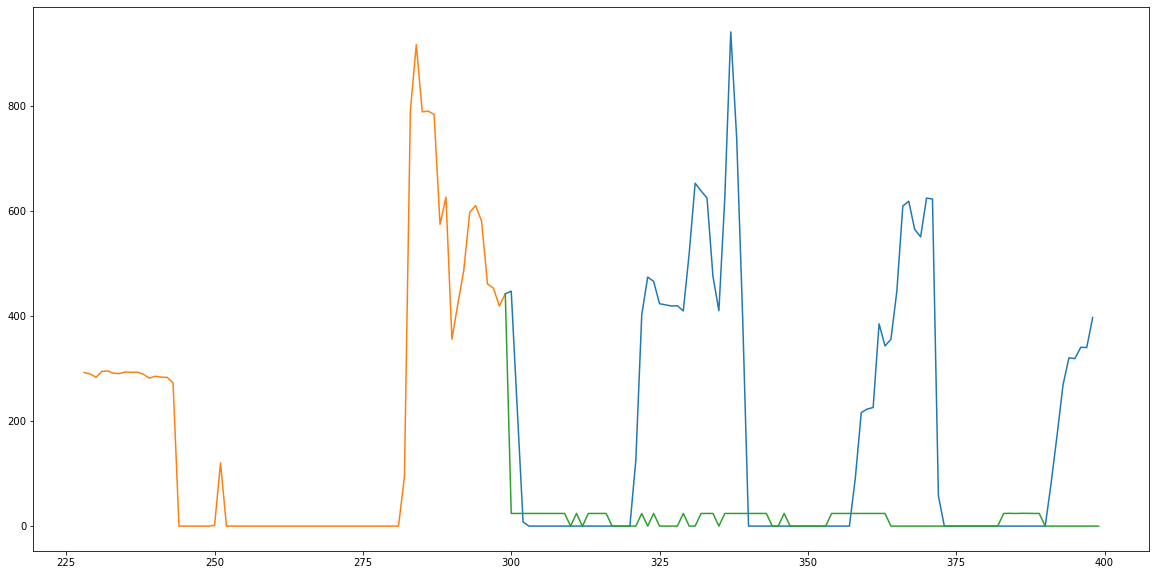

In [103]:
#plot forecasting result
import matplotlib.pyplot as plt

a = pd.read_csv('input_data/oil_crm_prod_X7405f.csv')
observed = a[299:399]

last_ind = int(round(model.train_data.idx[-1]))
plt.figure(figsize=(20, 10))
plt.plot(observed.prod_X7405f2)
plt.plot(model.train_data.idx[-72:], model.train_data.target[-72:])
plt.plot(range(last_ind, last_ind+len(ts_forecast)+1), np.append(model.train_data.target[-1], ts_forecast))

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(observed.prod_X7405f2, ts_forecast))